# Week 2 Data Exploration
## Jia Ni
In this assignment I conduct a preliminary analysis of the [gis data: City of Los Angeles Bikeways](https://geohub.lacity.org/datasets/ladot::city-of-los-angeles-bikeways-1/about). This dataset includes information on the City of Los Angeles' network of on-street and off-street bikeways. I primarily analyzed the proportions of different bikeway types to lay the groundwork for further analysis of the uneven distribution of bikeway development across different areas in LA.

### Import the libraries

In [1]:
import pandas as pd
import geopandas as gpd

### Read and add shapefile to notebook

In [2]:
bikeways = gpd.read_file('data/City_of_Los_Angeles_Bikeways.zip')

### Preview of data

In [3]:
bikeways.head()

,OBJECTID_1,SECT_ID,InputDate,Update_Dat,Install_Da,FY,Year_,Limits,STREET_DES,ST_TYPE,...,ClassIV_Pr,ClassIV__1,ClassIV__2,ST_WIDTH,Compare,ASSET_ID,Bikeway_ID,GlobalID,Shape__Len,geometry
0,1,3548700,2019-04-09,2019-04-09,2019-03-01,FY18/19,2019.0,6TH ST TO 4TH PL / SANTA FE AV,Avenue III,None,...,0,None,0,0.0,NaN,17783.0,1,7614417c-213b-48f2-bacc-56300c7d8e7b,354.897441,"LINESTRING Z (6491098.651 1837081.6 0, 6491130..."
1,2,3548600,2019-04-09,2019-04-09,2019-03-01,FY18/19,2019.0,6TH ST TO 4TH PL / SANTA FE AV,Avenue III,None,...,0,None,0,0.0,NaN,27684.0,2,219e9fd2-be47-4334-8825-47abe09db653,269.514341,"LINESTRING Z (6491048.222 1837450.535 0, 64910..."
2,3,3548600,2019-04-09,2019-04-09,2019-03-01,FY18/19,2019.0,6TH ST TO 4TH PL / SANTA FE AV,Avenue III,None,...,0,None,0,0.0,NaN,27027.0,3,74037f89-7eed-412a-a6f1-7459365ec6ab,102.905742,"LINESTRING Z (6491086.47 1837183.749 0, 649109..."
3,4,3548800,2019-04-09,2019-04-09,2019-03-01,FY18/19,2019.0,6TH ST TO 4TH PL / SANTA FE AV,Avenue III,None,...,0,None,0,0.0,NaN,39059.0,4,40355cda-35d8-4da0-a9e5-72c6e1df2b09,295.730268,"LINESTRING Z (6491130.941 1836728.175 0, 64911..."
4,5,6739300,NaT,NaT,2005-01-01,FY05/06,2005.0,WESTERN AV TO HALLDALE AV,Local Street,Local,...,0,None,0,30.0,NaN,4127.0,5,dc27915d-fb89-4e1b-9e3c-60c5436789d7,350.087190,"LINESTRING Z (6468297.018 1803164.204 0, 64681..."


### How many rows and columns?

In [4]:
bikeways.shape

(7293, 43)

### Datatype for each column

In [5]:
bikeways. info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7293 entries, 0 to 7292
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID_1  7293 non-null   int32         
 1   SECT_ID     7283 non-null   object        
 2   InputDate   1039 non-null   datetime64[ms]
 3   Update_Dat  1802 non-null   datetime64[ms]
 4   Install_Da  7293 non-null   datetime64[ms]
 5   FY          7291 non-null   object        
 6   Year_       7292 non-null   float64       
 7   Limits      7168 non-null   object        
 8   STREET_DES  6963 non-null   object        
 9   ST_TYPE     6043 non-null   object        
 10  OTHER       1026 non-null   object        
 11  CL_Miles    7290 non-null   float64       
 12  Lane_Miles  7290 non-null   float64       
 13  CD          7293 non-null   object        
 14  Network     3251 non-null   object        
 15  Bikeway     7293 non-null   object        
 16  Region      6740

### There are different types of bikeways. How many of each type are there?

In [6]:
bikeways['Bikeway'].value_counts()

Bikeway
Lane                       4163
Sharrowed Route            1048
Route                       705
Protected Bike Lane         680
Buffer Bike Lane            605
Path                         57
Bicycle Friendly Street      34
Detour Sharrowed Route        1
Name: count, dtype: int64

### Save it as a variable

In [7]:
type_count = bikeways['Bikeway'].value_counts()
type_count

Bikeway
Lane                       4163
Sharrowed Route            1048
Route                       705
Protected Bike Lane         680
Buffer Bike Lane            605
Path                         57
Bicycle Friendly Street      34
Detour Sharrowed Route        1
Name: count, dtype: int64

### Convert it into a dataframe

In [8]:
type_count = type_count.reset_index()
type_count

,Bikeway,count
0,Lane,4163
1,Sharrowed Route,1048
2,Route,705
3,Protected Bike Lane,680
4,Buffer Bike Lane,605
5,Path,57
6,Bicycle Friendly Street,34
7,Detour Sharrowed Route,1


### Rename columns

In [9]:
type_count.columns.to_list()
type_count.columns = ['bikeway type', 'count']
type_count

,bikeway type,count
0,Lane,4163
1,Sharrowed Route,1048
2,Route,705
3,Protected Bike Lane,680
4,Buffer Bike Lane,605
5,Path,57
6,Bicycle Friendly Street,34
7,Detour Sharrowed Route,1


### Make a bar plot of the bikeway types in LA

<Axes: title={'center': 'Different Types of Bikeways in LA'}, xlabel='bikeway type'>

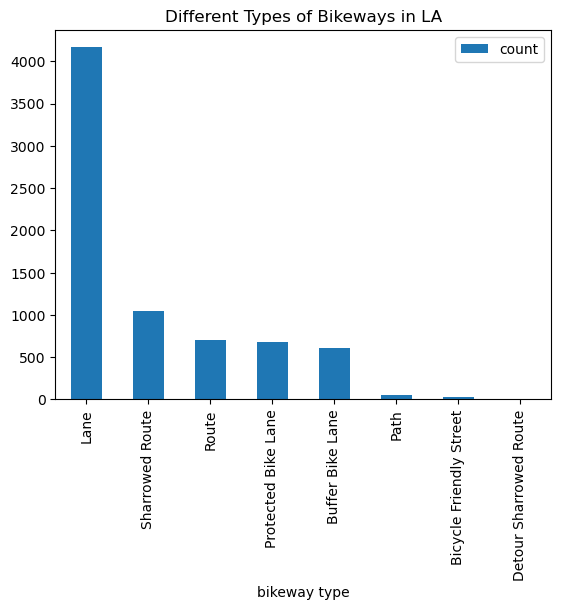

In [10]:
type_count.plot.bar(x = 'bikeway type', y = 'count', title = 'Different Types of Bikeways in LA')